# A4: Common Analysis
## Essex County, New Jersey
#### Aaliyah Hänni
#### 10/30/2021

Research Question: 
How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 15, 2021?


In this step we want you to create a graph that visualizes how the course of the disease was changed by masking policies. For your county:

* create a time series showing the changes in the derivative function of the rate of infection
* indicate days where masking policies were in effect (or not) 
* whether the difference in the derivative function was significant
* Optionally, you can add a second time series that shows the actual rate of infection.


Data Sources:
1. The RAW_us_confirmed_cases.csv file from the Kaggle repository of John Hopkins University COVID-19 data.
https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university
2. The CDC dataset of masking mandates by county.
https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Public-Mask-Mandates-Fro/62d6-pm5i
3. The New York Times mask compliance survey data.
https://github.com/nytimes/covid-19-data/tree/master/mask-use

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.dates import date2num

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
total_pop = 863728

## Importing data

In [3]:
cases = pd.read_csv('RAW_us_confirmed_cases.csv')
cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,9910,9954,9967,10043,10047,10048,10061,10083,10219,10228
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37167,37192,37224,37245,37258,37266,37285,37325,37350,37372
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3565,3566,3575,3577,3578,3578,3583,3595,3596,3596
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4236,4240,4246,4251,4252,4253,4256,4262,4275,4276
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10132,10162,10179,10192,10197,10207,10227,10338,10364,10371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5098,5110,5119,5119,5119,5152,5164,5168,5185,5204
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3744,3756,3781,3781,3781,3794,3805,3814,3817,3829
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1645,1657,1677,1677,1677,1690,1700,1715,1719,1731


In [4]:
mask_use = pd.read_csv('mask-use-by-county.csv')
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [5]:
mask_mandate = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
mask_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


## Filtering dataset to Essex county

Essex county FIPS = 34013 (Source: https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey)

In [6]:
mask_use = mask_use[mask_use['COUNTYFP'] == 34013]

In [7]:
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1780,34013,0.035,0.014,0.085,0.183,0.682


In [8]:
cases[cases['Province_State'] == 'New Jersey'] #index1850
cases = cases.iloc[1850]
cases = pd.DataFrame(cases).transpose()

In [9]:
mask_mandate = mask_mandate[mask_mandate['County_Name'] == 'Essex County']
mask_mandate = mask_mandate[mask_mandate['State_Tribe_Territory'] == 'NJ']

In [10]:
# convert to date type
mask_mandate['date'] = pd.to_datetime(mask_mandate['date'])

In [34]:
mask_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
473485,NJ,Essex County,34,13,2020-04-10,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No. 122 (Apr. 8, 2020)"
473486,NJ,Essex County,34,13,2020-04-11,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No. 122 (Apr. 8, 2020)"
473487,NJ,Essex County,34,13,2020-04-12,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No. 122 (Apr. 8, 2020)"
473488,NJ,Essex County,34,13,2020-04-13,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No.125 (Apr. 11, 2020)"
473490,NJ,Essex County,34,13,2020-04-14,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No.125 (Apr. 11, 2020)"
...,...,...,...,...,...,...,...,...,...,...
1264260,NJ,Essex County,34,13,2021-08-11,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"
1264261,NJ,Essex County,34,13,2021-08-12,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"
1264262,NJ,Essex County,34,13,2021-08-13,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"
1264263,NJ,Essex County,34,13,2021-08-14,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"


## Plotting Number of Cases

In [11]:
#daily_cases = cases.iloc[:, 11:] #gives only dates & cases

In [12]:
conf_cases = cases.iloc[:, 11:].transpose()

In [13]:
#daily_cases_vertical['date'] = daily_cases.columns.transpose()

In [14]:
conf_cases = conf_cases.reset_index()

In [15]:
conf_cases.columns = ['date', 'cases']

In [16]:
conf_cases['date'] = pd.to_datetime(conf_cases['date'])

In [17]:
conf_cases.dtypes

date     datetime64[ns]
cases            object
dtype: object

In [18]:
confirmed_cases = conf_cases

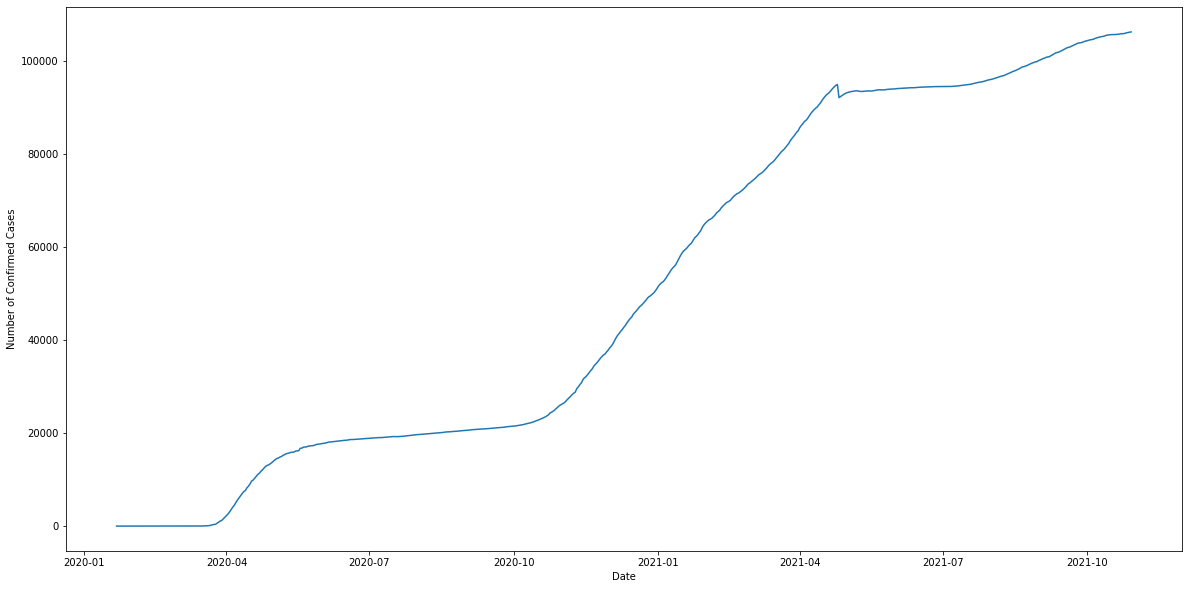

In [19]:
#confirmed cases

plt.rcParams["figure.figsize"] = (20,10) #resize plot

plt.plot(conf_cases['date'], conf_cases['cases'])

plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

plt.show()

In [20]:
population = np.ones(len(confirmed_cases,)) * total_pop

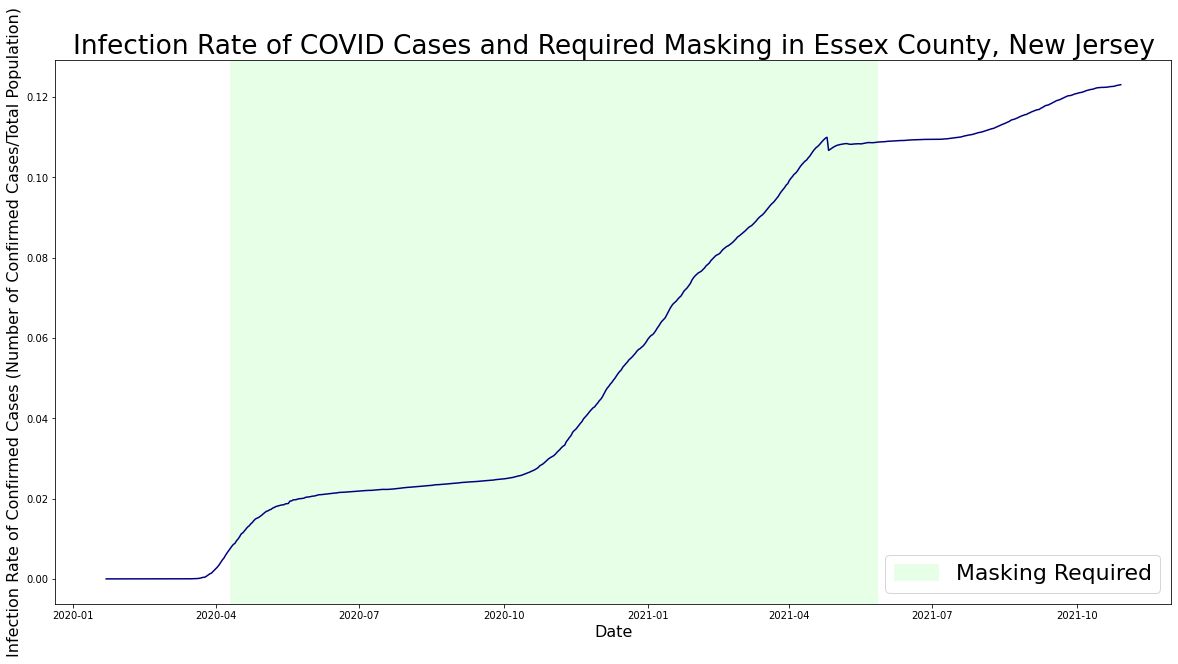

In [21]:
#confirmed cases

fig, ax = plt.subplots(figsize=(20,10)) # make viz bigger
matplotlib.rcParams.update({'font.size': 22}) #make font bigger


#plot masking
for i in range(len(mask_mandate) - 1):
    if mask_mandate['Face_Masks_Required_in_Public'].iloc[i] == 'Yes' and mask_mandate['Face_Masks_Required_in_Public'].iloc[i+1] == 'Yes':
        ax.axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="#e6ffe6")

ax.axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="#e6ffe6")

#plot confirmed cases
ax.plot(confirmed_cases['date'],confirmed_cases['cases']/population, color="navy")

ax.legend()
ax.set_ylabel('Infection Rate of Confirmed Cases (Number of Confirmed Cases/Total Population)', fontsize = 16)
ax.set_title('Infection Rate of COVID Cases and Required Masking in Essex County, New Jersey')

plt.xlabel('Date', fontsize = 16)
plt.show()

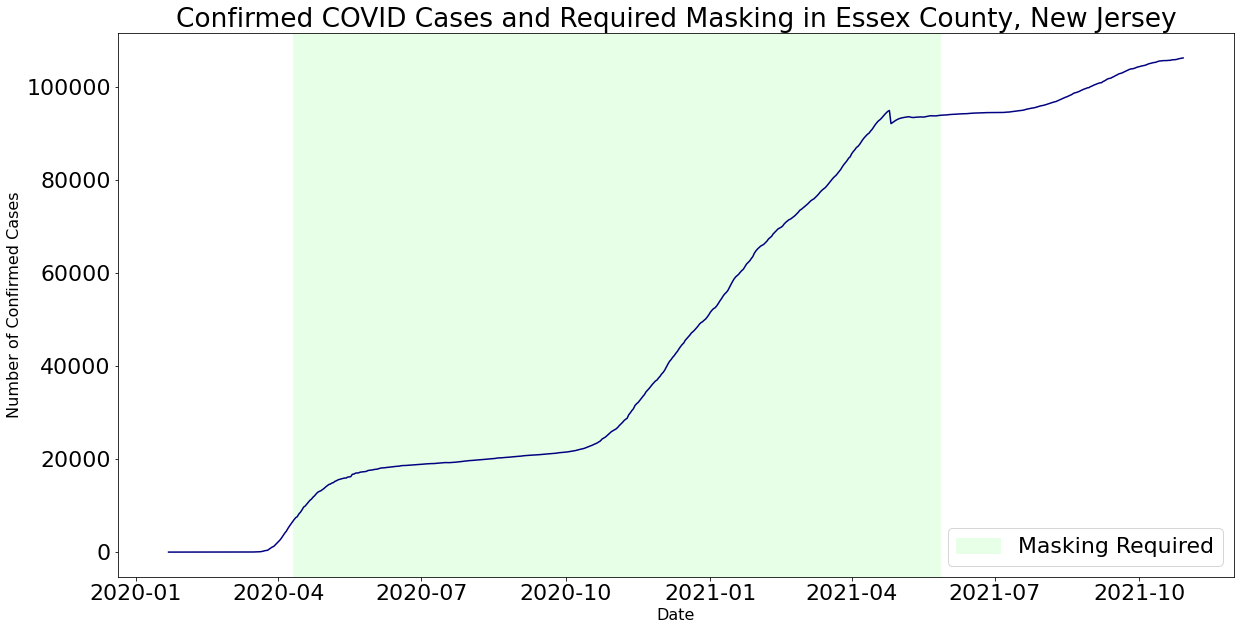

In [22]:
#rate of infection

fig, ax = plt.subplots(figsize=(20,10)) # make viz bigger
matplotlib.rcParams.update({'font.size': 22}) #make font bigger

#plot masking
for i in range(len(mask_mandate) - 1):
    if mask_mandate['Face_Masks_Required_in_Public'].iloc[i] == 'Yes' and mask_mandate['Face_Masks_Required_in_Public'].iloc[i+1] == 'Yes':
        ax.axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="#e6ffe6")

ax.axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="#e6ffe6")

#plot confirmed cases
ax.plot(confirmed_cases['date'],confirmed_cases['cases'], color="navy")

ax.legend()
ax.set_ylabel('Number of Confirmed Cases', fontsize = 16)
ax.set_title('Confirmed COVID Cases and Required Masking in Essex County, New Jersey')

plt.xlabel('Date', fontsize = 16)
plt.show()

In [23]:
#daily_cases

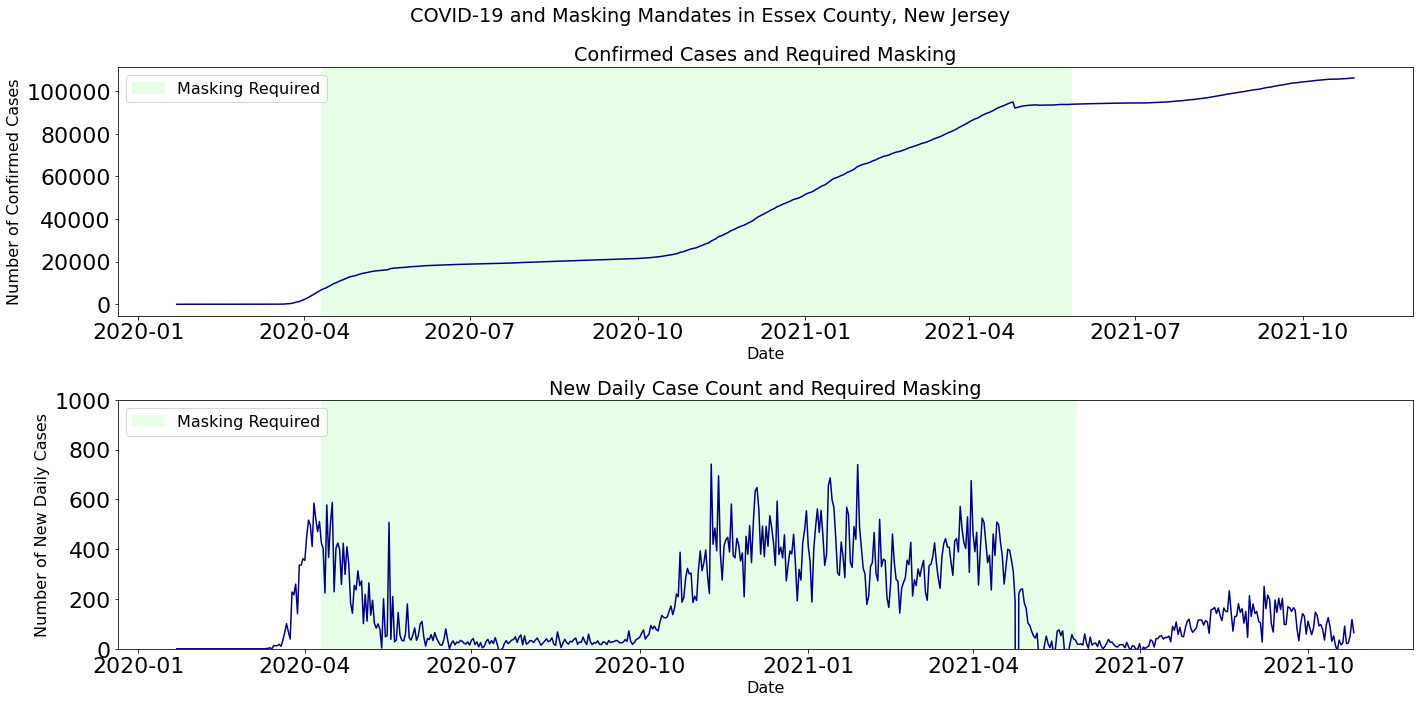

In [24]:
#two plots
fig, ax = plt.subplots(2)
matplotlib.rcParams.update({'font.size': 16}) #make font bigger


#plot masking
for i in range(len(mask_mandate) - 1):
    if mask_mandate['Face_Masks_Required_in_Public'].iloc[i] == 'Yes' and mask_mandate['Face_Masks_Required_in_Public'].iloc[i+1] == 'Yes':
        ax[0].axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="#e6ffe6")

ax[0].axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="#e6ffe6")

#plot confirmed cases
ax[0].plot(confirmed_cases['date'],confirmed_cases['cases'], color="navy")
ax[0].legend()
ax[0].legend(loc = 'upper left')
ax[0].set_ylabel('Number of Confirmed Cases', fontsize = 16)
ax[0].set_title('Confirmed Cases and Required Masking')

ax[0].set_xlabel('Date', fontsize = 16)


#define daily cases

#new daily case count
daily_cases = conf_cases
for i in range(len(conf_cases) - 1):
    #daily_cases['cases'][i] = conf_cases['cases'][i + 1] - conf_cases['cases'][i]
    daily_cases['cases'].iloc[i] = conf_cases['cases'].iloc[i + 1] - conf_cases['cases'].iloc[i]

#need delete the last row, since there is no known change in the next day
daily_cases = daily_cases.drop(daily_cases.tail(1).index) 



#confirmed cases
#plot masking shading
for i in range(len(mask_mandate) - 1):
    if mask_mandate['Face_Masks_Required_in_Public'].iloc[i] == 'Yes' and mask_mandate['Face_Masks_Required_in_Public'].iloc[i+1] == 'Yes':
        ax[1].axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="#e6ffe6")
        
ax[1].axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="#e6ffe6")
ax[1].legend()



#plot daily case count
ax[1].plot(daily_cases[:-2]['date'], daily_cases[:-2]['cases'], color='navy')
ax[1].set_title('New Daily Case Count and Required Masking')
ax[1].set_xlabel('Date', fontsize = 16)
ax[1].set_ylabel('Number of New Daily Cases', fontsize = 16)
ax[1].set_ylim(0, 1000)
ax[1].legend(loc = 'upper left')


fig.suptitle("COVID-19 and Masking Mandates in Essex County, New Jersey")
fig.tight_layout()
plt.show()

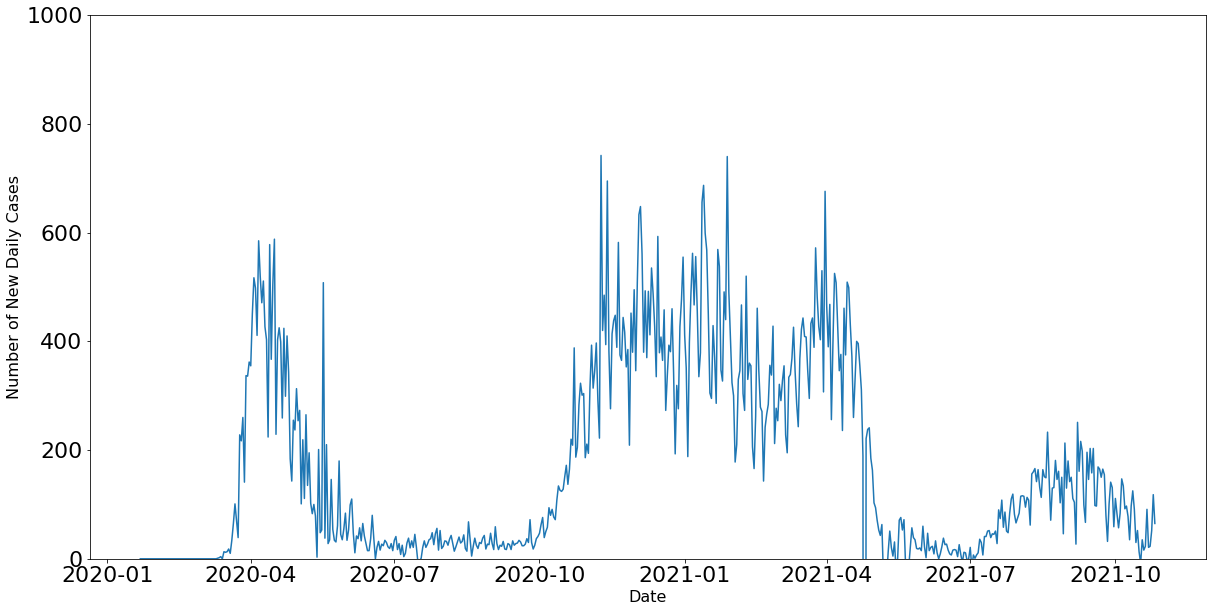

In [25]:






#daily cases
plt.rcParams["figure.figsize"] = (20,10) #resize plot
matplotlib.rcParams.update({'font.size': 22}) #make font bigger


plt.plot(daily_cases[:-2]['date'], daily_cases[:-2]['cases'])

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Number of New Daily Cases', fontsize = 16)

plt.ylim(0, 1000)

plt.show()

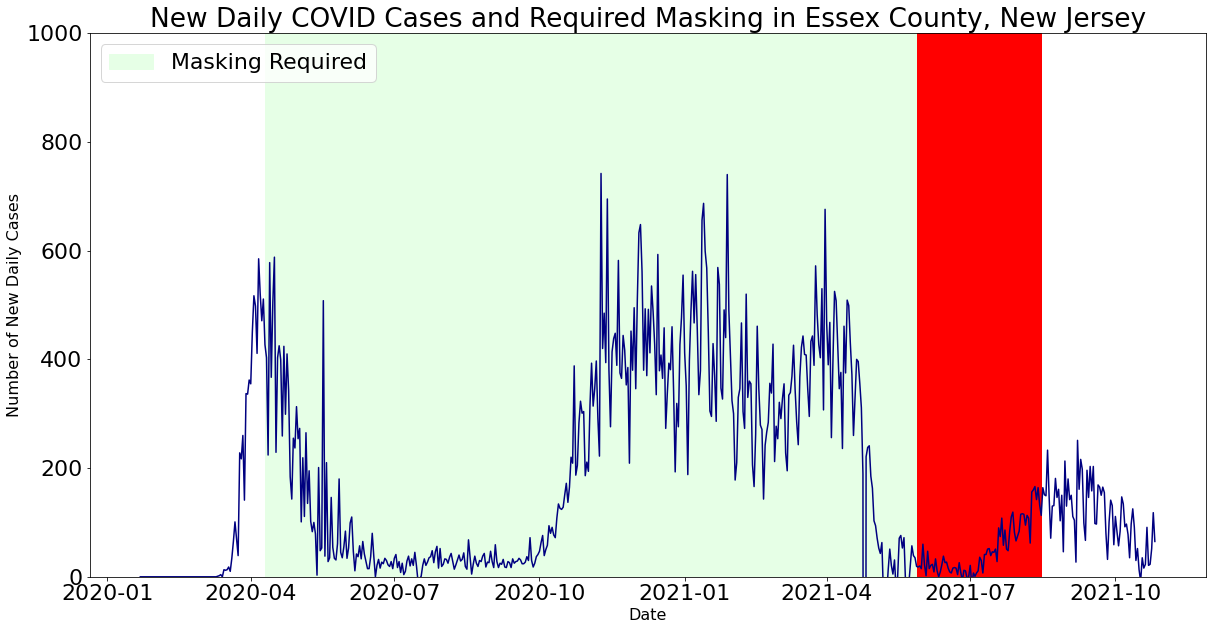

In [40]:
#confirmed cases
fig, ax = plt.subplots(figsize=(20,10))
matplotlib.rcParams.update({'font.size': 22}) #make font bigger

#plot masking shading
for i in range(len(mask_mandate) - 1):
    if mask_mandate['order_code'].iloc[i] == 1:
        ax.axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="#e6ffe6")

for i in range(len(mask_mandate) - 1):
    if mask_mandate['order_code'].iloc[i] == 2:
        ax.axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="red")

        
ax.axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="#e6ffe6")
ax.legend()


#plot daily case count
plt.plot(daily_cases[:-2]['date'], daily_cases[:-2]['cases'], color='navy')

ax.set_title('New Daily COVID Cases and Required Masking in Essex County, New Jersey')

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Number of New Daily Cases', fontsize = 16)

plt.ylim(0, 1000)

plt.show()

In [38]:
mask_mandate['order_code'].iloc[0]

1

## Plotting masking

In [27]:
mask_mandate[['date', 'Face_Masks_Required_in_Public']]

,date,Face_Masks_Required_in_Public
473485,2020-04-10,Yes
473486,2020-04-11,Yes
473487,2020-04-12,Yes
473488,2020-04-13,Yes
473490,2020-04-14,Yes
...,...,...
1264260,2021-08-11,No
1264261,2021-08-12,No
1264262,2021-08-13,No
1264263,2021-08-14,No


In [28]:
#indexing mask_mandate
#mask_mandate['date'].iloc[100]

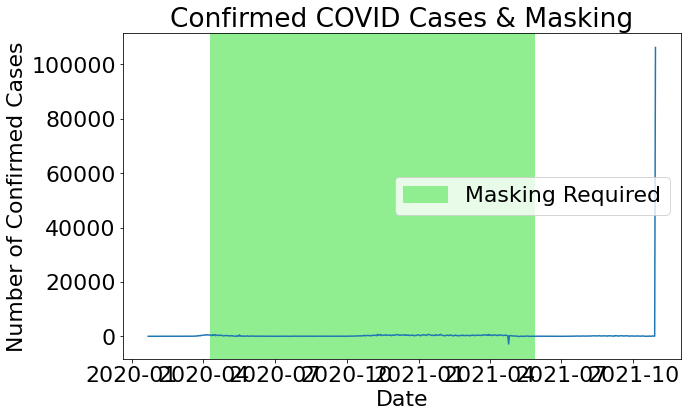

In [29]:
#confirmed cases

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(confirmed_cases['date'],confirmed_cases['cases'])


for i in range(len(mask_mandate) - 1):
    if mask_mandate['Face_Masks_Required_in_Public'].iloc[i] == 'Yes' and mask_mandate['Face_Masks_Required_in_Public'].iloc[i+1] == 'Yes':
        ax.axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="lightgreen")
        
        
ax.axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="lightgreen")

ax.legend()
ax.set_ylabel('Number of Confirmed Cases')
ax.set_title('Confirmed COVID Cases & Masking')

plt.xlabel('Date')
plt.show()

In [30]:
mask_use.iloc[:, 1:5].values

array([[0.035, 0.014, 0.085, 0.183]])

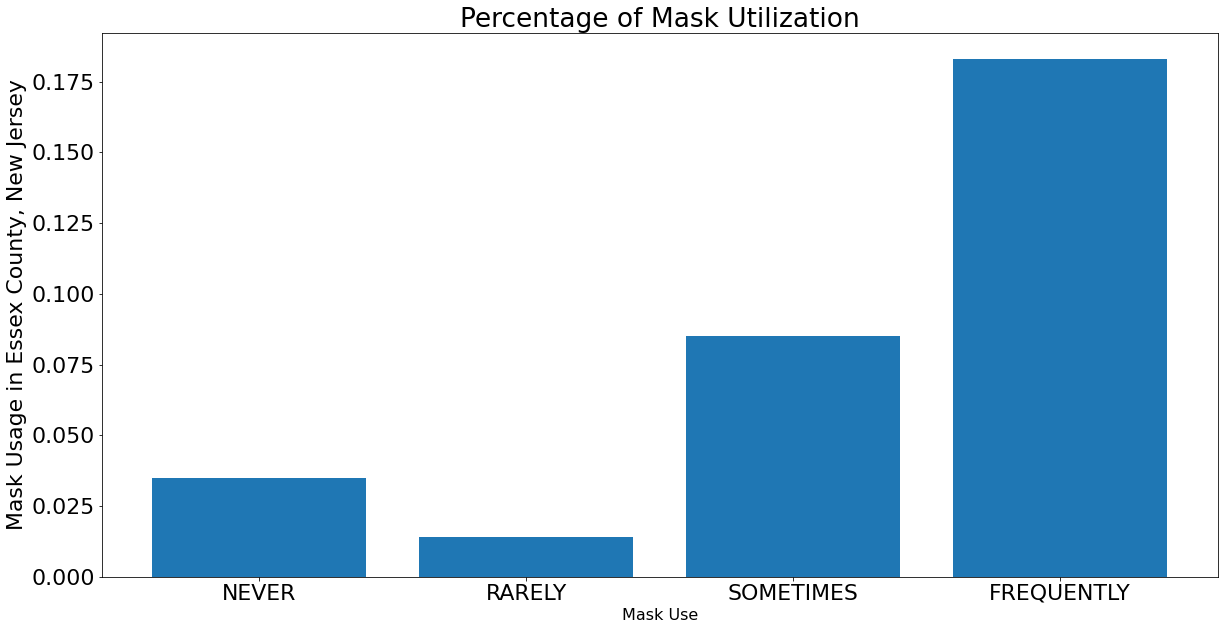

In [31]:
#plotting mask use

plt.bar(x = mask_use.iloc[:, 1:5].columns, height = [0.035,0.014,0.085,0.183])
plt.title('Percentage of Mask Utilization')
plt.ylabel('Mask Usage in Essex County, New Jersey')
plt.xlabel('Mask Use', fontsize = 16)
plt.show()

In [32]:
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1780,34013,0.035,0.014,0.085,0.183,0.682


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

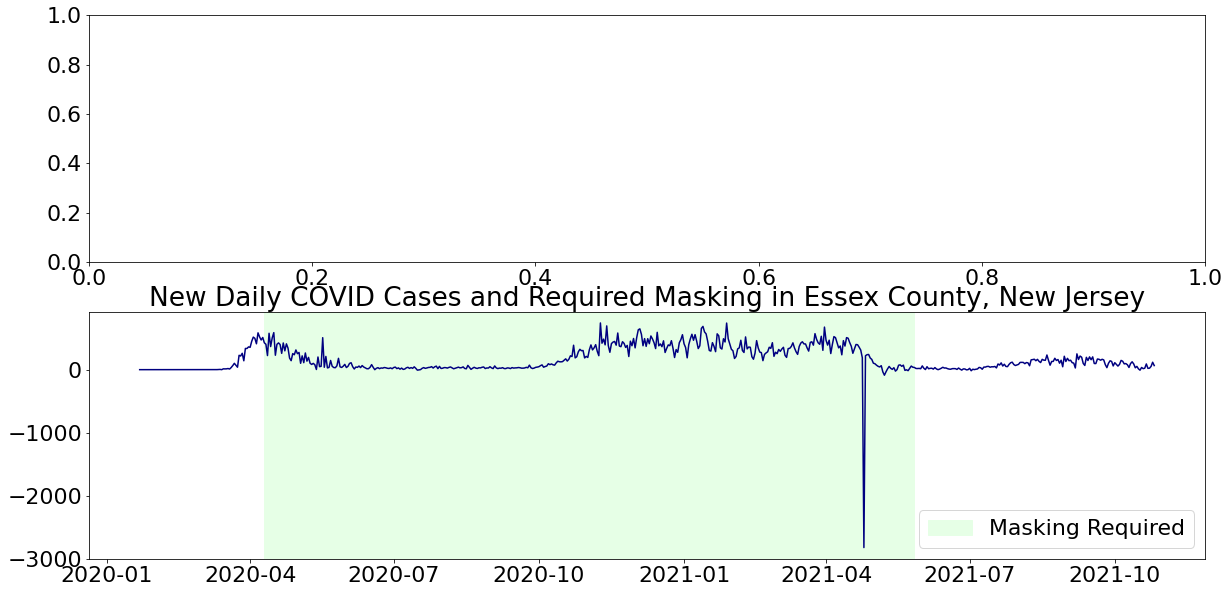

In [33]:
#confirmed cases
fig, ax = plt.subplots(2)
matplotlib.rcParams.update({'font.size': 22}) #make font bigger

#plot masking shading
for i in range(len(mask_mandate) - 1):
    if mask_mandate['Face_Masks_Required_in_Public'].iloc[i] == 'Yes' and mask_mandate['Face_Masks_Required_in_Public'].iloc[i+1] == 'Yes':
        ax[1].axvspan(mask_mandate['date'].iloc[i], mask_mandate['date'].iloc[i+1],color="#e6ffe6")
        
ax[1].axvspan(date2num(datetime(2020,4,10)), date2num(datetime(2020,4,11)), 
           label="Masking Required",color="#e6ffe6")
ax[1].legend()


#plot daily case count
ax[1].plot(daily_cases[:-2]['date'], daily_cases[:-2]['cases'], color='navy')
ax[1].set_title('New Daily COVID Cases and Required Masking in Essex County, New Jersey')
ax[1].xlabel('Date', fontsize = 16)
ax[1].ylabel('Number of New Daily Cases', fontsize = 16)
ax[1].ylim(0, 1000)

plt.show()

In [ ]:
#plotting mask use

plt.pie([0.035,0.014,0.085,0.183, 0.682], labels = ['NEVER (3.5%)', 'RARELY (1.4%)', 'SOMETIMES (8.5%)', 'FREQUENTLY (18.3%)', 'ALWAYS(68.2%)' ]
        , normalize = True, colors = ['lightcoral', 'bisque', '#FFFFB5', '#cce2cb', '#97c1a9'])
plt.title('Mask Use in Essex County, New Jersey')
plt.show()

## Cited Sources
https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/
